# Algorithm 7

In [1]:
from trajectory_generator import *
from functions import *
import numpy as np
import matplotlib.pyplot as plt
from cmap import Colormap
from scipy.special import comb
from scipy import integrate
from scipy import special
from itertools import combinations_with_replacement
from collections import Counter
import findiff
from scipy.linalg import logm

## Van der Pol oscillator

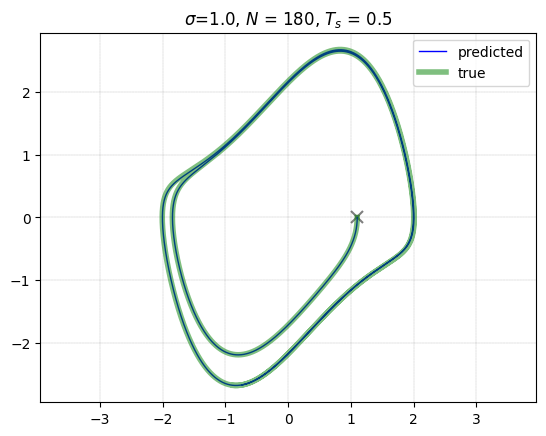

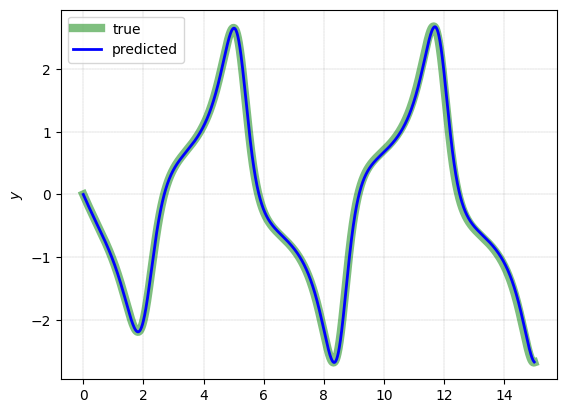

In [2]:
d=2 # dimension
mu=1 # parameter of van der Pol oscillator
model = VanderPol(mu)

m = 5
n = 7
rm = comb(m+d,d, exact = True) # dimension of V_{p,m}
rn = comb(n+d,d, exact = True) # dimension of V_{p,n}
N = 5*rn # number of initial values
Ts = 0.5 # sampling period

# data
X = 2*np.random.rand(d,N) - 1 
Y = model.evaluate(X, Ts) 

#construction of V_m^X and V_n^Y
sigma_kernel = 1.0
p = np.zeros((d,1)) #equilibrium point of the dynamical system
V_mY = constV_exp(Y, p, m, sigma_kernel) #V_m^Y 
V_nX = constV_exp(X, p, n, sigma_kernel) #V_n^X

#Computation of C-hat and A-hat
C = (V_mY@(np.linalg.pinv(V_nX)))[:,:rm]
A = logm(C)/Ts

def F_estimated_exp(x):
    return sigma_kernel*(A[1:d+1,:])@(constV_exp(x ,p, m, sigma_kernel))

mymodel = model_user_defined(F_estimated_exp)

# Figure for trajectries
h = 1e-3 # step size
x_init = np.array([[1.1,0]]).T # initial points

T = 15 # time period
t_axis=np.linspace(0,T,int(T/h))
Z_predicted=mymodel.generate_trajectory(x_init, T, h=h) #predicted trajectories
Z_exact=model.generate_trajectory(x_init, T, h=h) #true trajectories

# graph of trajectories
ax=plt.figure().add_subplot()
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.plot(x_init[0,:], x_init[1,:], 'x', c='k', markersize=8, markeredgewidth=1.5, alpha=0.5)
ax.plot(Z_predicted[:,0], Z_predicted[:,1], 'blue', linestyle='-' , linewidth=1, label = 'predicted', alpha=1)
ax.plot(Z_exact[:,0], Z_exact[:,1], 'green', linestyle='-' , linewidth=4, label='true', alpha=0.5)
ax.axis("equal")
ax.set_title(f'$\sigma$={sigma_kernel}, $N$ = {N}, $T_s$ = {Ts}')
ax.legend()

# graph of y-axis of trajectories
ax=plt.figure().add_subplot()
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.plot(t_axis,Z_exact[:,1], label='true', linewidth=6, alpha=0.5, color='green')
ax.plot(t_axis,Z_predicted[:,1], label='predicted',linewidth=2, color='blue')
ax.set_ylabel('$y$')
ax.legend()
plt.show()
plt.show()

## Lorenz attractor

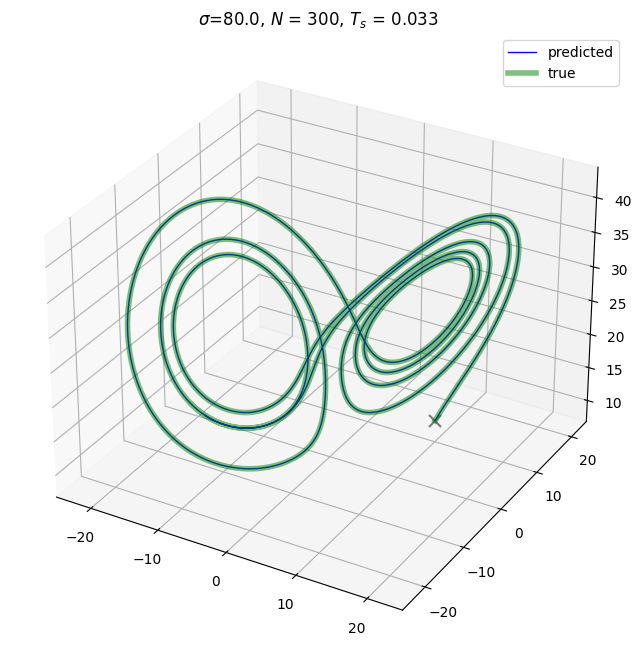

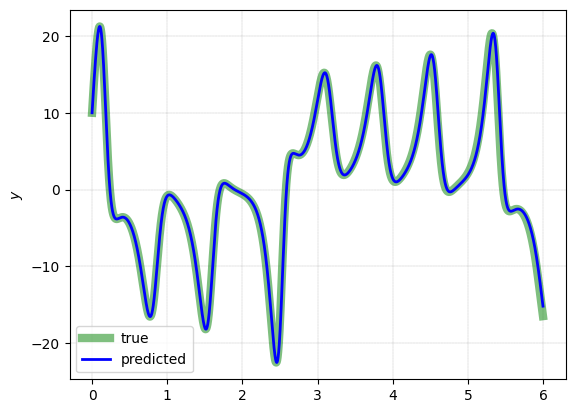

In [3]:
d=3
model = Lorenz()

m = 4
n = 11
rm = comb(m+d,d, exact = True) # dimension of V_{p,m}
rn = comb(n+d,d, exact = True) # dimension of V_{p,n}
N = 300 # number of initial values
Ts = 0.033 # sampling period

# data
X = 2*10*np.random.rand(d,N) - 10
Y = model.evaluate(X, Ts)

#construction of V_m^X and V_n^Y
sigma_kernel = 80.0
p = np.zeros((d,1)) #equilibrium point of the dynamical system
V_mY = constV_exp(Y, p, m, sigma_kernel) #V_m^Y 
V_nX = constV_exp(X, p, n, sigma_kernel) #V_n^X

#Computation of C_hat and A-hat
C = (V_mY@(np.linalg.pinv(V_nX)))[:,:rm]
A = logm(C)/Ts

def F_estimated_exp(x):
    return sigma_kernel*(A[1:d+1,:])@(constV_exp(x ,p, m, sigma_kernel))

mymodel = model_user_defined(F_estimated_exp)

# Figure for trajectries
h = 1e-3 #step size
x_init = np.array([[10,10,10]]).T #initial points

T = 6 # time period
t_axis=np.linspace(0,T,int(T/h))
Z_predicted=mymodel.generate_trajectory(x_init, T, h=h) #predicted trajectories
Z_exact=model.generate_trajectory(x_init, T, h=h) #true trajectories

# graph of trajectories
ax=plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.plot(x_init[0,:], x_init[1,:], x_init[2,:], 'x', c='k', markersize=8, markeredgewidth=1.5, alpha=0.5)
ax.plot(Z_predicted[:,0], Z_predicted[:,1], Z_predicted[:,2], 'blue', linestyle='-' , linewidth=1, label = 'predicted', alpha=1)
ax.plot(Z_exact[:,0], Z_exact[:,1], Z_exact[:,2], 'green', linestyle='-' , linewidth=4, label='true', alpha=0.5)
ax.axis("equal")
ax.set_title(f'$\sigma$={sigma_kernel}, $N$ = {N}, $T_s$ = {Ts}')
ax.legend()

# graph of y-axis of trajectories
ax=plt.figure().add_subplot()
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.plot(t_axis,Z_exact[:,1], label='true', linewidth=6, alpha=0.5, color='green')
ax.plot(t_axis,Z_predicted[:,1], label='predicted',linewidth=2, color='blue')
ax.set_ylabel('$y$')
ax.legend()
plt.show()